In [ ]:
Que 1: Name any five plots that we can plot using the Seaborn library.
Also, state the uses of each plot.

1.Line Plot : A Line Plot Is The Simplest Plot In All Plotting Types,
As It Is The Visualization Of A Single Function. This Plot Helps Us To 
See The Relationship Between X-Axis, Y-Axis And It Also Takes Some
Parameters Such As Hue, Size, Color, Etc.  
 
2.Countplot : A Count Plot Is Used To Show The Counts Of Observations 
In Each Categorical Bin Using Bars.This Method Is Accepting The Parameters
X, Y  Which Take The Name Of A Variable In Data, Hue It Is An Optional 
Parameter It Helps To Take Column Name For Color Encoding.
Data Is Also An Optional Parameter That Takes DataFrame, Array,
Or List Of Arrays, Dataset For Plotting.

3.Bar Chart: A Bar Chart Is A Way Of Comparing A Set Of Categorical Data.
It Is Better To Convert Continuous Data To Bins Before Plotting.
The Bar Chart Displays Data Using Several Bars, Each Representing A
Particular Category. This Method Is Accepting The Parameters X, Y  Which
Take The Name Of A Variable In Data, Hue It Is An Optional Parameter 
It Helps To Take Column Name For Color Encoding.

4.Pairplot: Pair Plot Creates A Grid Of Axis Such That Each Numeric Variable 
In Data Will Create A Plot Between Each Other The Y-Axis Across A Single Row
And The X-Axis Across A Single Column. The Diagonal Plots Are A Univariate 
Distribution Plot That Helps To Draw The Marginal Distribution Of The Data In Each Column.
A Pair Plot Pairwise Relationships With Other Columns In The Data Frame And Also Plot Pair Plot With Itself.

5.Scatter Plot: Scatter Plot Is The Same As A Line Plot, In A Line Plot Instead Of Points
Being Joined By Line Segments, The Points Are Shown Individually With A Dot, Circle, Or 
Any Other Shape. The Position Of Each Marker On The Horizontal And Vertical Axis Indicates
Values For An Individual Data Point. This Plot Is Used To Observe Relationships Between Variables.
This Method Is Accepting The Parameters X, Y  Which Take The Name Of A Variable In Data,
Hue It Is An Optional Parameter It Helps To Take Column Name For Color Encoding. Marker 
Is A Parameter That Is Used To Change The Shape Of The Point Which Is Shown In The Plot.

6.Histogram: A Histogram Is A Graph That Shows The Underlying Frequency Distribution Of
A Set Of Continuous Data. This Chart Is Helpful In Data Collection And Data Analysis And
Hence It Is Widely Used In The Analytics Industry. By Plotting It Allows To Inspect The 
Overall Distribution Of The Data, Outlier, Skew Present In The Data.



In [ ]:
Que 2: Load the "fmri" dataset using the load_dataset function of seaborn. Plot a line plot using x = 
"timepoint" and y = "signal" for different events and regions. 

Note:  timepoint, signal, event, and region are columns in the fmri dataset


In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
For this tutorial I will be using the fmri data set which comes along
with seaborn when you install it.But I could not find much details about 
the dataset,so I need to dig down to find the details about the dataset.
Note that once you load the dataset, it is nothing but a pandas dataframe 
object and we can use all the commands,functions and trics of pandas are applicable for the analysis.





In [5]:
fmri = sns.load_dataset("fmri")
fmri.head()


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [6]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [7]:
fmri.tail()

,subject,timepoint,event,region,signal
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367
1063,s0,0,cue,parietal,-0.006899


In [ ]:

fmri["region"].unique()

array(['parietal', 'frontal'], dtype=object)

fmri["region"].nunique()

2

fmri["event"].unique()

array(['stim', 'cue'], dtype=object)

fmri["event"].nunique()

2

fmri["subject"].unique()

array(['s13', 's5', 's12', 's11', 's10', 's9', 's8', 's7', 's6', 's4',
       's3', 's2', 's1', 's0'], dtype=object)

fmri["subject"].nunique()

14

fmri["timepoint"].unique()

array([18, 14, 17,  9, 16, 15,  0, 13, 12, 11, 10,  3,  7,  8,  2,  6,  5,
        4,  1], dtype=int64)

fmri["timepoint"].nunique()

19

fmri["signal"].unique()

array([-0.01755158, -0.08088293, -0.08103302, ..., -0.00493911,
       -0.02536671, -0.00689923])

fmri["signal"].nunique()

1064
With all the above commands, we get the most important details we need to further 
explore the dataset. Take a moment and write down all of the info you gained about
this dataset up to now, I will leave it you as an exercise.
Plotting subsets of data with semantic mappings
The lineplot() function in seaborn has the same flexibility as it's cousin scatterplot():
it can show up to three additional variables by modifying the hue, size, and style of the 
plot elements. It does so using the same API as scatterplot(), meaning that we don’t need 
to stop and think about the parameters that control the look of lines vs. points in matplotlib.
Using semantics in lineplot() will also determine how the data get aggregated. For example,
adding a hue semantic with two levels splits the plot into two lines and error bands,
coloring each to indicate which subset of the data they correspond to.

sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

<seaborn.axisgrid.FacetGrid at 0x204a6cb2d68>

Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

sns.relplot(x="timepoint", y="signal", hue="region", style="event",kind="line", data=fmri)

<seaborn.axisgrid.FacetGrid at 0x204a6cb2d30>

But you can identify subsets by the markers used at each observation, either together 
with the dashes or instead of them like below:

sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri)

<seaborn.axisgrid.FacetGrid at 0x204a70ee240>

As with scatter plots, be cautious about making line plots using multiple semantics.
While sometimes informative, they can also be difficult to parse and interpret.
But even when you are only examining changes across one additional variable, 
it can be useful to alter both the color and style of the lines. This can make 
the plot more accessible when printed to black-and-white or viewed by someone with color blindness:

sns.relplot(x="timepoint", y="signal", hue="event", style="event",kind="line", data=fmri)

<seaborn.axisgrid.FacetGrid at 0x204a7177ba8>

When you are working with repeated measures data (that is, you have units that were sampled
multiple times), you can also plot each sampling unit separately without distinguishing them
through semantics. This avoids cluttering the legend:

sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"))

<seaborn.axisgrid.FacetGrid at 0x204a71d3780>

let us plot for same thing with cue event now instead of stim, as shown below:

sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'cue'"))

<seaborn.axisgrid.FacetGrid at 0x204a909b3c8>



In [ ]:
Que 3: Load the "titanic" dataset using the load_dataset function of seaborn.
Plot two box plots using x = 'pclass', y = 'age' and y = 'fare'.
Note:  pclass, age, and fare are columns in the titanic dataset.

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
titanic = pd.read_csv('tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


/tmp/ipykernel_77/3231741211.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["Fare"],kde=False)


<AxesSubplot: xlabel='Fare', ylabel='Age'>

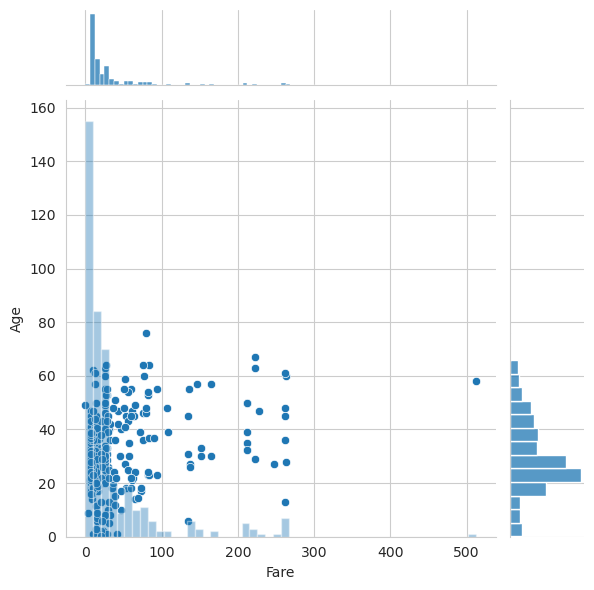

In [4]:
sns.jointplot(x='Fare',y='Age',data=titanic)
sns.distplot(titanic["Fare"],kde=False)

<AxesSubplot: xlabel='Sex', ylabel='count'>

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


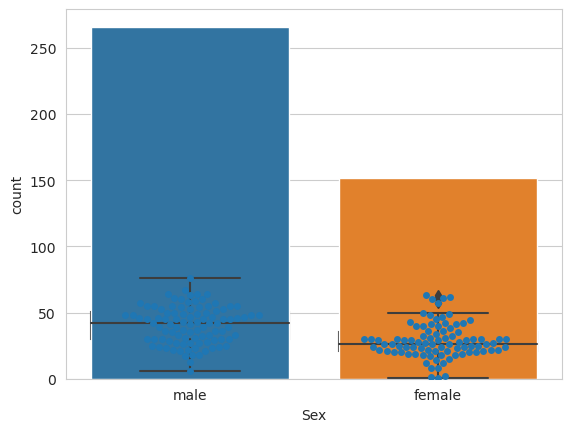

In [5]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

sns.swarmplot(x='Pclass',y='Age',data=titanic)

sns.countplot(x='Sex',data=titanic)

/tmp/ipykernel_77/1646980996.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = titanic.corr()


Text(0.5, 1.0, 'titanic.corr()')

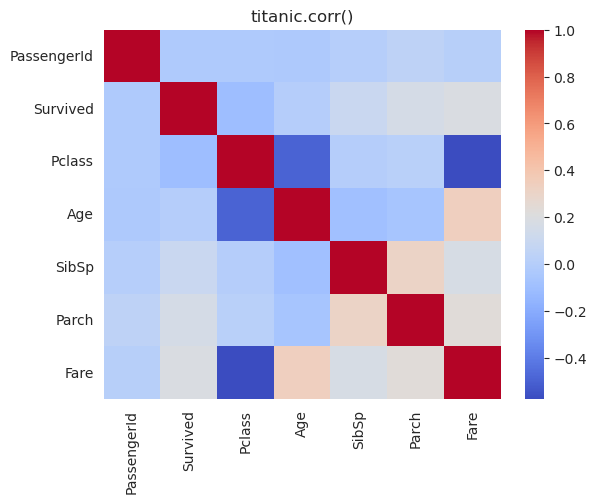

In [6]:
tc = titanic.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


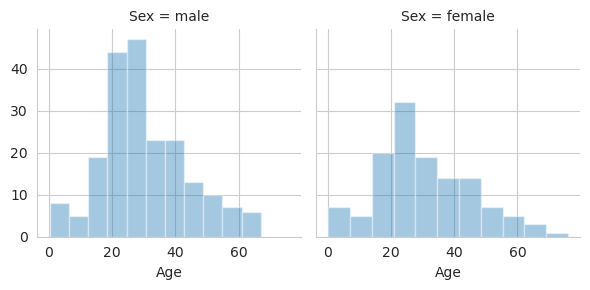

In [7]:
g = sns.FacetGrid(data=titanic, col='Sex')
g.map(sns.distplot, 'Age',kde=False)


In [ ]:
Que 4: Use the "diamonds" dataset from seaborn to plot a histogram for the 'price' column. Use the hue 
parameter for the 'cut' column of the diamonds dataset. 


In [9]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.shape
diamonds.describe()
sample = diamonds.sample(3000)
sns.histplot(x=sample["price"])
sns.histplot(sample["price"], stat="percent")
sns.histplot(sample["carat"], stat="percent")
sns.kdeplot(sample["table"])
sns.histplot(sample["cut"])

In [11]:
diamonds.shape

(53940, 10)

In [12]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot: xlabel='price', ylabel='Count'>

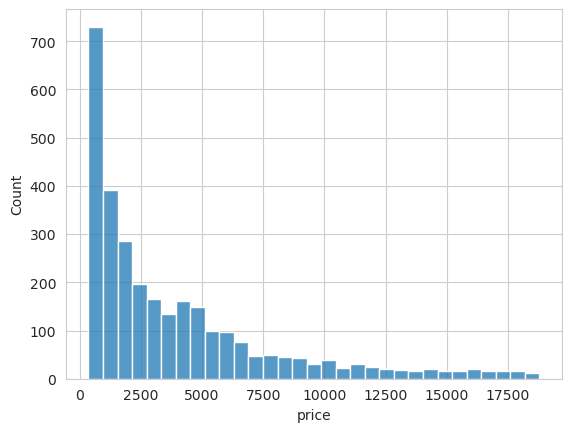

In [13]:
sample = diamonds.sample(3000)
sns.histplot(x=sample["price"])

<AxesSubplot: xlabel='price', ylabel='Percent'>

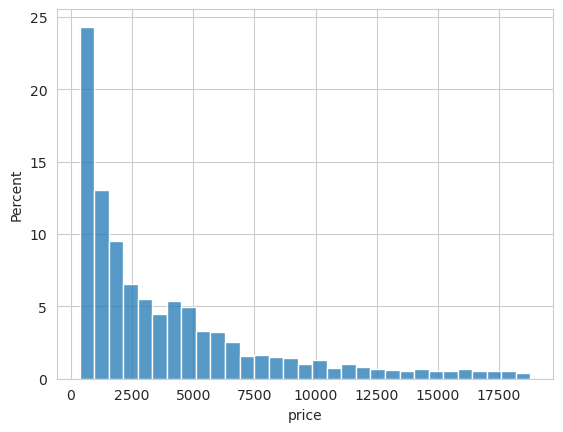

In [17]:
sns.histplot(sample["price"], stat="percent")


<AxesSubplot: xlabel='carat', ylabel='Percent'>

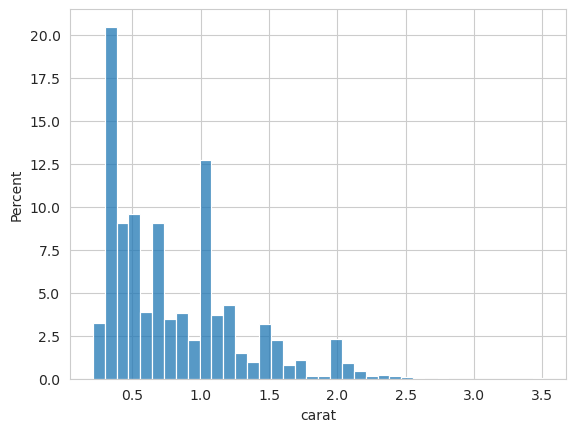

In [18]:
sns.histplot(sample["carat"], stat="percent")

<AxesSubplot: xlabel='table', ylabel='Density'>

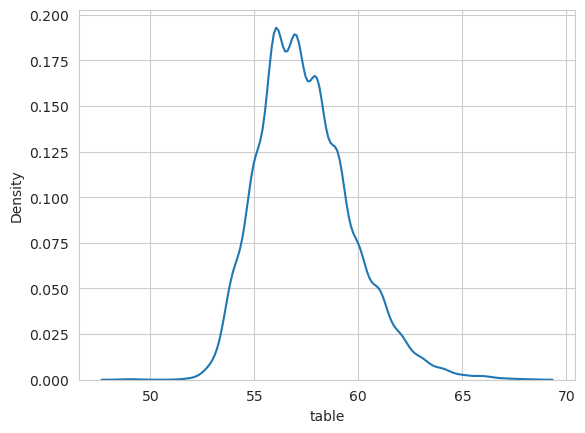

In [19]:
sns.kdeplot(sample["table"])

<AxesSubplot: xlabel='cut', ylabel='Count'>

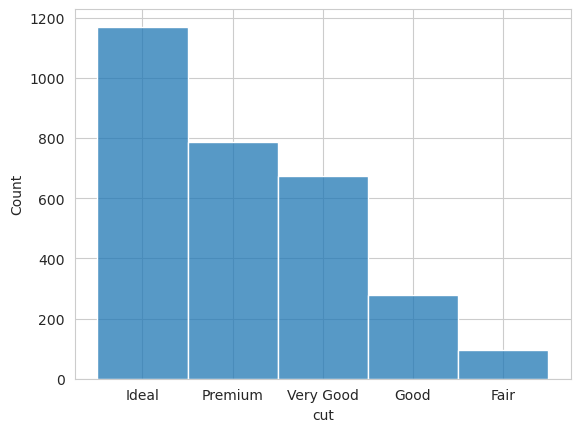

In [20]:
sns.histplot(sample["cut"])

In [ ]:
Que 5: Use the "iris" dataset from seaborn to plot a pair plot. 
Use the hue parameter for the "species" column of the iris dataset. 



In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
iris = sns.load_dataset('iris')

In [23]:

X = iris.drop('species', axis=1)
y = iris['species']


In [24]:
summary_stats = X.describe()
print("Summary Statistics:")
print(summary_stats)



Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


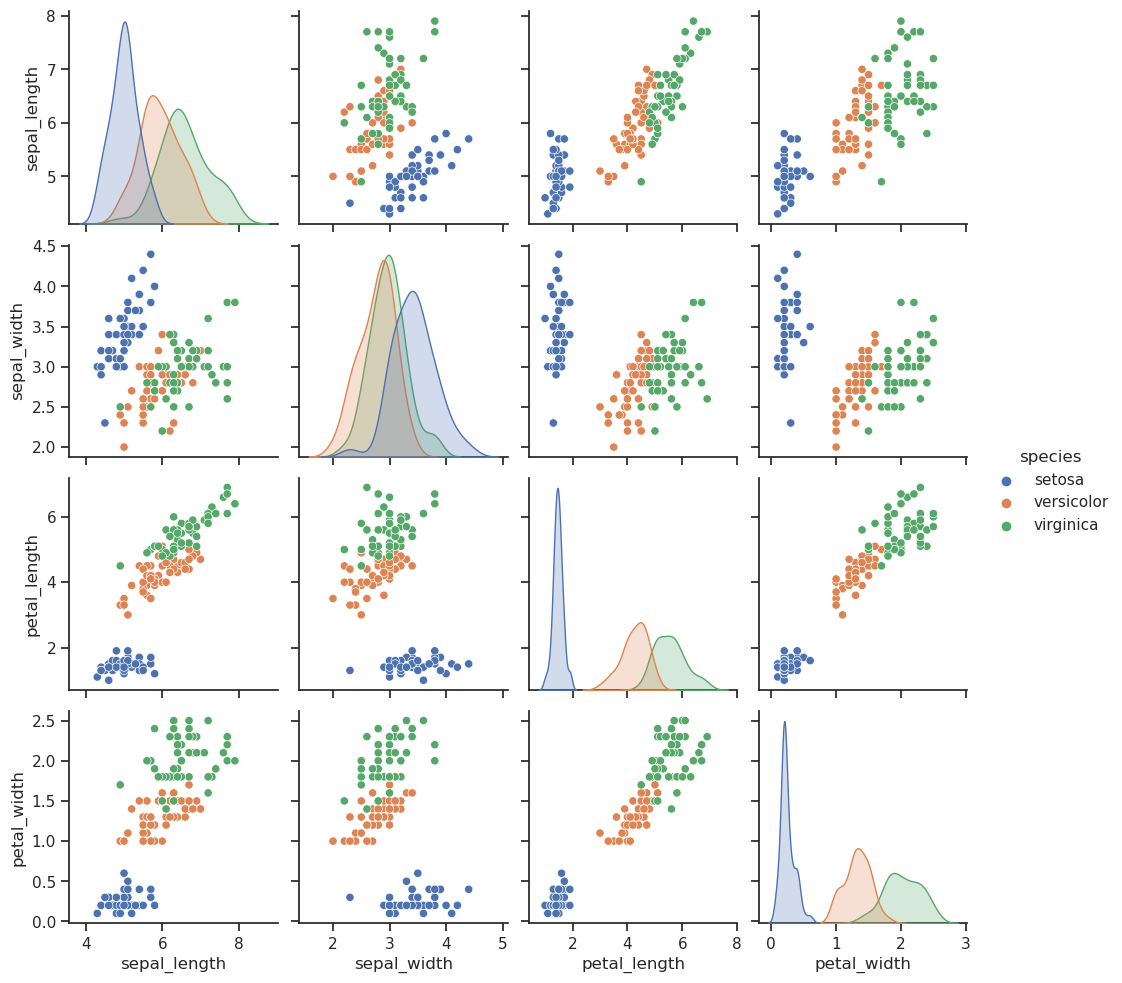

In [26]:
sns.set(style="ticks")
sns.pairplot(iris, hue="species")
plt.show()


In [ ]:
Que 6: Use the "flights" dataset from seaborn to plot a heatmap.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()



/tmp/ipykernel_77/216386846.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = flights.pivot("month", "year", "passengers")


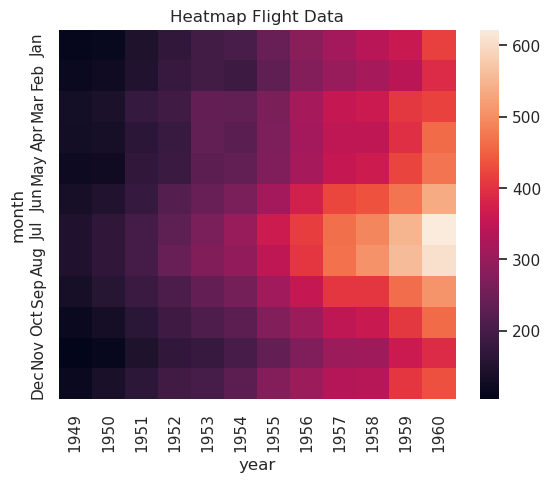

In [29]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)
plt.title("Heatmap Flight Data")
plt.show()
